<a href="https://www.kaggle.com/code/bhavinmoriya/statistical-inference-in-python-2?scriptVersionId=112379366" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Chi square test

It is used to check if two categorical dist are same.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import norm, chisquare, chi2, chi2_contingency, f_oneway, poisson, ttest_ind
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

We generate population data with different race. We check if minnesota race dist follows the population dist.

In [2]:
population = pd.DataFrame(['white']*50000 + ['black'] * 100_000 + ['red'] * 25000 + ['asian'] * 40000 + ['others'] * 60000)
minnesota = pd.DataFrame(['white']*500 + ['black'] * 100 + ['red'] * 250 + ['asian'] * 400 + ['others'] * 600)

H0 : population and minnesota have same dist across races

We shall do Hyp testing now. If stat > crit value and pval < significance level then we reject H0 (that is, population and minnesota don't have same dist across races.

In [3]:
f_obs=minnesota.value_counts(normalize=False).sort_index()
f_exp=len(minnesota)*population.value_counts(normalize=True).sort_index() # expected count for minnesota if it had dist same as minnesota

In [4]:
minnesota.value_counts(normalize=True).sort_index(),population.value_counts(normalize=True).sort_index()

(asian     0.216216
 black     0.054054
 others    0.324324
 red       0.135135
 white     0.270270
 dtype: float64,
 asian     0.145455
 black     0.363636
 others    0.218182
 red       0.090909
 white     0.181818
 dtype: float64)

Dist is very different so we expect to reject null hyp.

In [5]:
statistic, pval = chisquare(f_obs=f_obs,
                            f_exp=f_exp)
print(f'Chi sq stat and pvalue are : {statistic, pval}')

Chi sq stat and pvalue are : (766.2162162162163, 1.5948364430109697e-164)


Hence at 5% sigficance lev we reject the null hyp and hence dist is different.

In [6]:
crit = chi2.ppf(q=.95, # 95% conf level
               df=4) # deg of freedom is no of categories - 1
pval = 1 - chi2.cdf(x=statistic,
                   df = 4)
print(f'Critical and P values are : {crit, pval}')

Critical and P values are : (9.487729036781154, 0.0)


Since statistic value is way above critical value we reject the NH. One more reason to reject NH is, pval is < .05 (5% sig lev).

# Chi square test for independence

What if we wanted to check if two categorical variables distributions are independent? For example,

1. Birth month might not tell if you like rice or not.
2. Education level might not tell if you like white or black.

We shall check the relationship b/w race and political party.

H0 : race and party is indepent

In [7]:
np.random.seed(0)
voter_race = np.random.choice(a='asian black white red others'.split(),
                             p = [.3, .3, .1, .2, .1],
                             size=1000)
voter_party = np.random.choice(a='democrat independent republican'.split(),
                             p = [.5, .3, .2],
                             size=1000)

In [8]:
voters = pd.crosstab(voter_race, voter_party, margins=True)
observed = voters.iloc[:-1,:-1] # taking off margins
observed

col_0,democrat,independent,republican
row_0,,,
asian,146,94,67
black,153,89,61
others,53,41,14
red,79,49,55
white,50,21,28


Now we calculate expected proportions which is last column producting with last row and normalize with 1000 (size of data).

In [9]:
expected = pd.DataFrame((np.outer(voters.loc[:,'All'],
                                  voters.loc['All',:]) / len(voter_race))[:-1, :-1])
expected.index = voters.index[:-1]
expected.columns = voters.columns[:-1]

expected.index.name = 'Race'
expected.columns.name = 'Party'

expected

Party,democrat,independent,republican
Race,,,
asian,147.667,90.258,69.075
black,145.743,89.082,68.175
others,51.948,31.752,24.300
red,88.023,53.802,41.175
white,47.619,29.106,22.275


In [10]:
chi2_contingency(observed=observed)

(18.27693700298903,
 0.019243425998633244,
 8,
 array([[147.667,  90.258,  69.075],
        [145.743,  89.082,  68.175],
        [ 51.948,  31.752,  24.3  ],
        [ 88.023,  53.802,  41.175],
        [ 47.619,  29.106,  22.275]]))

In [11]:
stat, pval, _, _ = chi2_contingency(observed=observed)
crit = chi2.ppf(q=.95,
               df=8) # product of no of column - 1 with no of rows - 1
pval2 = 1 - chi2.cdf(x=stat,
                df=8)
#pval2 would be same as pval
print(f'Critical value, pval and stat are : {crit, pval, pval2, stat}')

Critical value, pval and stat are : (15.50731305586545, 0.019243425998633244, 0.019243425998633268, 18.27693700298903)


Recall :
1. Stats is above Critical value $\Rightarrow$ we reject NH. Hence data is dependent.
2. pvalue < .05 $\Rightarrow$ we reject NH. Hence data is dependent.

Hence we reject the H0 and hence race and party can not be assumed independent.


# ANOVA (Analysis of Variance)

If we had two groups then t-test could be used to compare them. If we have more than 2 groups, say races and ages then we can use ANOVA. Well, we could carry out t-test for each pair of groups also, but that would increase the chance of false positives :( 

In [12]:
races = 'asian black white red others'.split()

voter_race = np.random.choice(races,
                             p=[.2,.1,.5,.1,.1],
                             size=1000)

voter_age = poisson.rvs(loc=18,
                       mu=30,
                       size=1000)

df = pd.DataFrame({'Age':voter_age, 'Race':voter_race})
# groups = df.groupby(by='Race').groups
# asian = df[df.Race == 'asian'].Age.values

In [13]:
f_oneway(df[df.Race == 'asian'].Age, 
         df[df.Race == 'black'].Age,
         df[df.Race == 'white'].Age,
         df[df.Race == 'red'].Age,
         df[df.Race == 'others'].Age,)

F_onewayResult(statistic=0.7496936828197043, pvalue=0.5582820423315908)

Hence at 5% significance level, we could not reject H0. Hence we could conclude that the races and ages are independent. F-stat and p value we obtained above could be done using statsmodels also, as follow. Note we will get exact same F-stat and p value.

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Age ~ Race', # Dep var ~ Indep var
           data=df).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                sum_sq     df         F    PR(>F)
Race         94.579236    4.0  0.749694  0.558282
Residual  31381.596764  995.0       NaN       NaN


Let us try to generate some data where we could reject H0.

In [15]:
white_age = poisson.rvs(loc=18,
                       mu=32,
                       size=1000)
voter_age = np.where(voter_race == 'white', white_age, voter_age)

df = pd.DataFrame({'Age':voter_age, 'Race':voter_race})

f_oneway(df[df.Race == 'asian'].Age, 
         df[df.Race == 'black'].Age,
         df[df.Race == 'white'].Age,
         df[df.Race == 'red'].Age,
         df[df.Race == 'others'].Age,)

F_onewayResult(statistic=9.878590968321694, pvalue=7.702762363245719e-08)

p value is far less compare to significance lvel .05 and hence we reject H0. Hence there is a dependence b/w race and ages. Here we know the cause of this depedence was a white group. In general we may not know which group might be causing this. To get the idea of which group is playing a role in causing dependence we could perform post-hoc test. To perform this test we do t-test for each pair of groups as follows. 

One Problem with this approach is, when we do so many pairing and perform t-test there is a possibility of getting low p value by chance. To resolve this, we take a conservative approach, we divide significance level by 10, called Bonferroni correction.

In [16]:
from itertools import product
race_pair = list(product(races,races))

for pair in race_pair:
#     print(pair)
    stat, p = ttest_ind(df[df.Race == pair[0]].Age,
                   df[df.Race == pair[1]].Age)
    if p < .05 / 10: # Bonferroni correction
        print(f'{pair} is significant with stat and p value = {stat, p}')
    else:
        pass

('asian', 'white') is significant with stat and p value = (-4.332795296407029, 1.6924853198325215e-05)
('black', 'white') is significant with stat and p value = (-2.991536349783927, 0.00288803172859041)
('white', 'asian') is significant with stat and p value = (4.332795296407029, 1.6924853198325215e-05)
('white', 'black') is significant with stat and p value = (2.991536349783927, 0.00288803172859041)
('white', 'red') is significant with stat and p value = (4.316453234018599, 1.85553014920583e-05)
('white', 'others') is significant with stat and p value = (3.638703973243205, 0.0002970684749880014)
('red', 'white') is significant with stat and p value = (-4.316453234018599, 1.85553014920583e-05)
('others', 'white') is significant with stat and p value = (-3.638703973243205, 0.0002970684749880014)


As you can see every time there is a white in pair we get low p value and hence we could say that white is causing the dependence with race and ages.

- Bonferroni being conservative, might miss some pair which are dependent
- Tuckey test being less conservative will take care of this problem

**PS. If we do t-test for each pair with significance level (SL), say 5%, then for each pair sig level compounds. For example if we had 3 pair of groups then doing t-test with SL=5%, we get compount SL = 1 - (.95)^3 = .143, which is far from .05. So doing t-test for each pair is not good idea.**

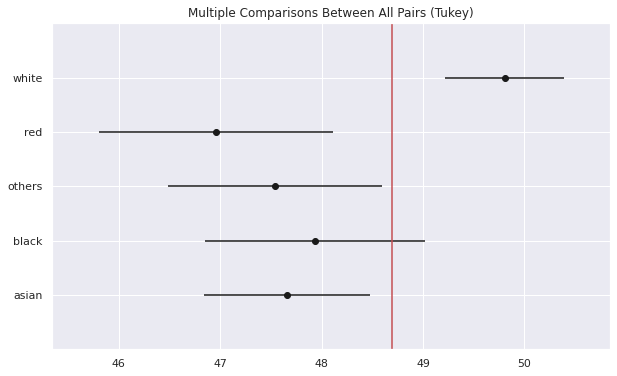

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df.Age,
                          groups=df.Race,
                          alpha=.05)

tukey.plot_simultaneous(); # plot groups confidence intervals
# plt.axvline(x=49.57, c='r');
plt.axvline(x=df.Age.mean(), c='r');

In [18]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
asian,black,0.2728,0.9952,-1.6497,2.1953,False
asian,others,-0.1207,0.9998,-2.0155,1.7742,False
asian,red,-0.7033,0.8708,-2.695,1.2884,False
asian,white,2.1428,0.0002,0.7838,3.5018,True
black,others,-0.3934,0.9871,-2.5324,1.7456,False
black,red,-0.9761,0.7522,-3.2013,1.2492,False
black,white,1.87,0.0207,0.1873,3.5527,True
others,red,-0.5826,0.9511,-2.7841,1.6188,False
others,white,2.2634,0.0018,0.6123,3.9145,True
red,white,2.8461,0.0001,1.0846,4.6075,True


As expected all pairs with white are having dependence.